In [ ]:
from google.colab import drive
drive.mount('/content/drive')
"""
Chiederà la password
"""

Mounted at /content/drive


'\nChiederà la password\n'

In [ ]:
!sudo apt-get install -y python-dev pkg-config
!sudo apt-get install -y \
    libavformat-dev libavcodec-dev libavdevice-dev \
    libavutil-dev libswscale-dev libswresample-dev libavfilter-dev
!pip install av
!pip install -i https://test.pypi.org/simple/ supportlib
import supportlib.gettingdata as getdata
import av
import glob
import os
import time
import tqdm
import datetime
import argparse

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pkg-config is already the newest version (0.29.1-0ubuntu2).
python-dev is already the newest version (2.7.15~rc1-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libavcodec-dev is already the newest version (7:3.4.8-0ubuntu0.2).
libavcodec-dev set to manually installed.
libavformat-dev is already the newest version (7:3.4.8-0ubuntu0.2).
libavformat-dev set to manually installed.
libavutil-dev is already the newest version (7:3.4.8-0ubuntu0.2).
libavutil-dev set to manually installed.
libswresample-dev is already the newest version (7:3.4.8-0ubuntu0.2).
libswresample-dev set to manually installed.
libswscale-dev is already the newest version (7:3.4.8-0ubuntu0.2).
libswscale-dev set to manually installed.
The following additional packages will be installed:
  libpostproc-dev
The f

# Preprocessing Datasets

In [ ]:
def video_to_frame(path,out_path):
    vidcap = cv2.VideoCapture(path)
    success,image = vidcap.read()
    count = 0
    while success:
      cv2.imwrite(os.path.join(out_path,"{}.jpg".format(count)), image)
      success,image = vidcap.read()
      count += 1

In [ ]:
def extract_frames(video_path):
    frames = []
    try:
      video = av.open(video_path)
      for frame in video.decode(0):
        try:
          yield frame.to_image()
        except:
          print("Fail inner")
    except:
      print("FAIL x")

In [ ]:

from tqdm.autonotebook import tqdm
#DA CAMBIARE PER EFFETTUARE IL PRE-PROC
path_in_train = '/content/drive/MyDrive/DATA3x1Slow/train' # '/content/Anomaly_Dataset/Anomaly_Videos/Anomaly-Videos-Part-1'
path_out_train = '/content/drive/MyDrive/DATASET3X1OUT/train' # '/content/Dataset'
path_in_test = '/content/drive/MyDrive/DATA3x1Slow/test'
path_out_test = '/content/drive/MyDrive/DATASET3X1OUT/test'
"""
Questa parte è utile per l'estrazione di frame di ogni video di un singolo dataset (quindi 
per il cross dataset 3x1 questo codice verrà ripetuto per tutti e 4 i dataset dato che devono
essere pre-processati).
Ricordo che il singolo dataset è organizzato in questa maniera:

  - cartella "nome dataset"
    - cartella "classe 1"
      - video 1
      ...
    - cartella "classe 2"
      - video 1
      ...
    ...

Se non è chiaro vedere dai ragazzi di Vior, l'avvio
N.B. : modificare path_in e path_out sulla base del dataset in una determinata esecuzione
"""
for i in tqdm(os.listdir(path_in_train)):
  p1 = os.path.join(path_in_train,i)
  r1 = os.path.join(path_out_train,i)
  print ("p1 : ", p1)
  print ("r1 : ", r1)
  
  if os.path.exists(r1):
    continue
  
  os.makedirs(r1,exist_ok = True)
  for j in os.listdir(p1):
    vid_path = os.path.join(p1,j)
    r2 = os.path.join(r1,j[:-4])
    os.makedirs(r2,exist_ok = True)
    print (vid_path)
    for j, frame in enumerate((extract_frames(vid_path))):
      frame.save(os.path.join(r2, f"{j}.jpg"))

for i in tqdm(os.listdir(path_in_test)):
  p1 = os.path.join(path_in_test,i)
  r1 = os.path.join(path_out_test,i)
  print ("p1 : ", p1)
  print ("r1 : ", r1)
  
  if os.path.exists(r1):
    continue
  
  os.makedirs(r1,exist_ok = True)
  for j in os.listdir(p1):
    vid_path = os.path.join(p1,j)
    r2 = os.path.join(r1,j[:-4])
    os.makedirs(r2,exist_ok = True)
    print (vid_path)
    for j, frame in enumerate((extract_frames(vid_path))):
      frame.save(os.path.join(r2, f"{j}.jpg"))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  


  0%|          | 0/2 [00:00<?, ?it/s]

p1 :  /content/drive/MyDrive/DATA3x1Slow/train/violence
r1 :  /content/drive/MyDrive/DATASET3X1OUT/train/violence
/content/drive/MyDrive/DATA3x1Slow/train/violence/0_1_4.avi
/content/drive/MyDrive/DATA3x1Slow/train/violence/1_1_2.avi
/content/drive/MyDrive/DATA3x1Slow/train/violence/3_1_3.avi
/content/drive/MyDrive/DATA3x1Slow/train/violence/5_1_5.avi
/content/drive/MyDrive/DATA3x1Slow/train/violence/6_2_4.avi
/content/drive/MyDrive/DATA3x1Slow/train/violence/9_2_2.avi
/content/drive/MyDrive/DATA3x1Slow/train/violence/7_2_5.avi
/content/drive/MyDrive/DATA3x1Slow/train/violence/11_2_3.avi
/content/drive/MyDrive/DATA3x1Slow/train/violence/12_3_4.avi
/content/drive/MyDrive/DATA3x1Slow/train/violence/13_3_2.avi
/content/drive/MyDrive/DATA3x1Slow/train/violence/15_3_3.avi
/content/drive/MyDrive/DATA3x1Slow/train/violence/16_3_5.avi
/content/drive/MyDrive/DATA3x1Slow/train/violence/18_4_4.avi
/content/drive/MyDrive/DATA3x1Slow/train/violence/20_4_2.avi
/content/drive/MyDrive/DATA3x1Slow/trai

  0%|          | 0/2 [00:00<?, ?it/s]

p1 :  /content/drive/MyDrive/DATA3x1Slow/test/violence
r1 :  /content/drive/MyDrive/DATASET3X1OUT/test/violence
/content/drive/MyDrive/DATA3x1Slow/test/violence/TurkishBowAdnan_shoot_bow_u_cm_np1_fr_goo_0.avi
/content/drive/MyDrive/DATA3x1Slow/test/violence/The_Matrix_5_punch_u_cm_np1_fr_med_18.avi
/content/drive/MyDrive/DATA3x1Slow/test/violence/The_Matrix_2_kick_f_cm_np1_le_med_6.avi
/content/drive/MyDrive/DATA3x1Slow/test/violence/Veoh_Alpha_Dog_1_throw_f_cm_np2_fr_med_57.avi
/content/drive/MyDrive/DATA3x1Slow/test/violence/Shadow_of_a_Doubt_throw_u_cm_np1_ba_med_0.avi
/content/drive/MyDrive/DATA3x1Slow/test/violence/v_Archery_g07_c01.avi
/content/drive/MyDrive/DATA3x1Slow/test/violence/v_Archery_g05_c04.avi
/content/drive/MyDrive/DATA3x1Slow/test/violence/v_Archery_g09_c01.avi
/content/drive/MyDrive/DATA3x1Slow/test/violence/v_Archery_g03_c03.avi
/content/drive/MyDrive/DATA3x1Slow/test/violence/v_Archery_g02_c02.avi
/content/drive/MyDrive/DATA3x1Slow/test/violence/v_Archery_g08_c01

In [ ]:
# DA CAMBIARE PER EFFETTUARE IL PRE-PROC
path_train = '/content/drive/MyDrive/DATASET3X1OUT/train'
res_train = '/content/drive/MyDrive/DATASET3X1OUT/train'
path_test = '/content/drive/MyDrive/DATASET3X1OUT/test'
res_test = '/content/drive/MyDrive/DATASET3X1OUT/test'

In [ ]:

seq_length = 16
import numpy as np
import cv2

def preprocess_data(seq_length,path,res):
  dir = os.listdir(path)
  #print (dir)
  for i in tqdm(dir):
      p1 = os.path.join(path,i)
      r1 = os.path.join(res,i)
      os.makedirs(r1,exist_ok = True)
      for j in os.listdir(p1):
          p2 = os.path.join(p1,j)
          r2 = os.path.join(r1,j)
          l = 0
          print("p2 : ", p2)
          print("r2 : ", r2)
          skip_length = int(len(os.listdir(p2))/seq_length)
          print (skip_length)
          for m in range(10):
              k = m
              while(l!=seq_length):
                p3 = os.path.join(p2,str(k) + ".jpg")
                try:
                  img = cv2.imread(p3)
                  img = cv2.resize(img,(128,128))
                  if(k==0):
                    img1 = img
                  else:
                    img1 = np.append(img1,img,axis = 1)
                except:
                  print("oh Shit ",p3)
                k = k+skip_length
                l = l+1  
              cv2.imwrite(r2 + str(m)+".jpg",img1)


In [ ]:
start = time.time()
preprocess_data(seq_length,path_train,res_train)
preprocess_data(seq_length,path_test,res_test)
end = time.time()-start
print("Tempo di Pre-Proc : ", end)

  0%|          | 0/2 [00:00<?, ?it/s]

p2 :  /content/drive/MyDrive/DATASET3X1OUT/train/violence/0_1_4
r2 :  /content/drive/MyDrive/DATASET3X1OUT/train/violence/0_1_4
6
p2 :  /content/drive/MyDrive/DATASET3X1OUT/train/violence/1_1_2
r2 :  /content/drive/MyDrive/DATASET3X1OUT/train/violence/1_1_2
7
p2 :  /content/drive/MyDrive/DATASET3X1OUT/train/violence/3_1_3
r2 :  /content/drive/MyDrive/DATASET3X1OUT/train/violence/3_1_3
7
p2 :  /content/drive/MyDrive/DATASET3X1OUT/train/violence/5_1_5
r2 :  /content/drive/MyDrive/DATASET3X1OUT/train/violence/5_1_5
6
p2 :  /content/drive/MyDrive/DATASET3X1OUT/train/violence/6_2_4
r2 :  /content/drive/MyDrive/DATASET3X1OUT/train/violence/6_2_4
6
p2 :  /content/drive/MyDrive/DATASET3X1OUT/train/violence/9_2_2
r2 :  /content/drive/MyDrive/DATASET3X1OUT/train/violence/9_2_2
5
p2 :  /content/drive/MyDrive/DATASET3X1OUT/train/violence/7_2_5
r2 :  /content/drive/MyDrive/DATASET3X1OUT/train/violence/7_2_5
6
p2 :  /content/drive/MyDrive/DATASET3X1OUT/train/violence/11_2_3
r2 :  /content/drive/MyDr

  0%|          | 0/2 [00:00<?, ?it/s]

p2 :  /content/drive/MyDrive/DATASET3X1OUT/test/violence/TurkishBowAdnan_shoot_bow_u_cm_np1_fr_goo_0
r2 :  /content/drive/MyDrive/DATASET3X1OUT/test/violence/TurkishBowAdnan_shoot_bow_u_cm_np1_fr_goo_0
6
p2 :  /content/drive/MyDrive/DATASET3X1OUT/test/violence/The_Matrix_5_punch_u_cm_np1_fr_med_18
r2 :  /content/drive/MyDrive/DATASET3X1OUT/test/violence/The_Matrix_5_punch_u_cm_np1_fr_med_18
2
p2 :  /content/drive/MyDrive/DATASET3X1OUT/test/violence/The_Matrix_2_kick_f_cm_np1_le_med_6
r2 :  /content/drive/MyDrive/DATASET3X1OUT/test/violence/The_Matrix_2_kick_f_cm_np1_le_med_6
6
p2 :  /content/drive/MyDrive/DATASET3X1OUT/test/violence/Veoh_Alpha_Dog_1_throw_f_cm_np2_fr_med_57
r2 :  /content/drive/MyDrive/DATASET3X1OUT/test/violence/Veoh_Alpha_Dog_1_throw_f_cm_np2_fr_med_57
6
p2 :  /content/drive/MyDrive/DATASET3X1OUT/test/violence/Shadow_of_a_Doubt_throw_u_cm_np1_ba_med_0
r2 :  /content/drive/MyDrive/DATASET3X1OUT/test/violence/Shadow_of_a_Doubt_throw_u_cm_np1_ba_med_0
3
p2 :  /content/d

In [ ]:
# Questa istruzione mi serve a zippare il dataset pre-processato.
#Io ho fatto così: gli ho preprocessati tutti e poi ho solo eseguito la fase di train e test
!zip -r /content/Slow3x1.zip /content/drive/MyDrive/DATASET3X1OUT

Output streaming troncato alle ultime 5000 righe.
  adding: content/drive/MyDrive/DATASET3X1OUT/test/non_violence/v_MoppingFloor_g04_c05/271.jpg (deflated 1%)
  adding: content/drive/MyDrive/DATASET3X1OUT/test/non_violence/v_MoppingFloor_g04_c05/272.jpg (deflated 1%)
  adding: content/drive/MyDrive/DATASET3X1OUT/test/non_violence/v_MoppingFloor_g04_c05/273.jpg (deflated 1%)
  adding: content/drive/MyDrive/DATASET3X1OUT/test/non_violence/v_MoppingFloor_g04_c05/274.jpg (deflated 1%)
  adding: content/drive/MyDrive/DATASET3X1OUT/test/non_violence/v_MoppingFloor_g04_c05/275.jpg (deflated 1%)
  adding: content/drive/MyDrive/DATASET3X1OUT/test/non_violence/v_MoppingFloor_g04_c05/276.jpg (deflated 1%)
  adding: content/drive/MyDrive/DATASET3X1OUT/test/non_violence/v_MoppingFloor_g04_c05/277.jpg (deflated 1%)
  adding: content/drive/MyDrive/DATASET3X1OUT/test/non_violence/v_MoppingFloor_g04_c05/278.jpg (deflated 1%)
  adding: content/drive/MyDrive/DATASET3X1OUT/test/non_violence/v_MoppingFloor

# TRAIN NETWORK

In [2]:
# Questa istruzione mi serve ad unzippare il dataset pre-processato per uno specifico test.
zip_path = '/content/drive/MyDrive/DATASET3X1OUT.zip'
!cp {zip_path} .
!unzip -q DATASET3X1OUT.zip

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import torchvision
import torch
from torch import nn
import torch.nn.functional as F
import torchvision.models as models
import torch.optim as optim
import copy
import os
from tqdm.autonotebook import tqdm
import matplotlib.pyplot as plt
from torch.utils.data import Dataset
from torchvision import transforms
from torch.utils.data import DataLoader
import numpy as np
from torch.utils.data.sampler import SubsetRandomSampler
import cv2
import sys
import time

In [38]:
# DA CAMBIARE: queste cartelle servono anche per creare i dataloaders per il train set e test set
# se vuoi effettuare test cross bisogna decommentare data_path_test e path_test, se invece vuoi effettaure test singolo allora lasciale commentate
data_path_train = '/content/DATASET3X1OUT/train'
data_path_test = '/content/DATASET3X1OUT/test'
path_train = '/content/DATASET3X1OUT/train'
path_test = '/content/DATASET3X1OUT/test'
weights_dir = '/content/drive/MyDrive/Colab_Notebooks_slowfast/weights_Slow3x1'

In [39]:
"""
Qui si decidono le classi
"""
classes = os.listdir(data_path_train)
decoder = {}
for i in range(len(classes)):
    decoder[classes[i]] = i
encoder = {}
for i in range(len(classes)):
    encoder[i] = classes[i]

In [40]:
id_train = []
for i in os.listdir(path_train):
  p1 = os.path.join(path_train,i)
  for j in os.listdir(p1):
    p2 = os.path.join(p1,j)
    id_train.append((i,p2))
print ("id_train : ", id_train)

# DA CAMBIARE: queste cartelle servono anche per creare i dataloaders per il train set e test set
# se vuoi effettuare test cross bisogna decommentare la parte di sotto, se invece vuoi effettaure test singolo allora lasciala commentata


id_test = []
for i in os.listdir(path_test):
  p1 = os.path.join(path_test,i)
  for j in os.listdir(p1):
    p2 = os.path.join(p1,j)
    id_test.append((i,p2))
print ("id_test : ", id_test)


id_train :  [('violence', '/content/DATASET3X1OUT/train/violence/7_12_37.jpg'), ('violence', '/content/DATASET3X1OUT/train/violence/Fighting007_x264_Trim3.jpg'), ('violence', '/content/DATASET3X1OUT/train/violence/kick__Best_CHUCK_NORRIS_kick_to_the_nuts!_kick_f_cm_np1_ba_goo_09.jpg'), ('violence', '/content/DATASET3X1OUT/train/violence/ArcherySVK_shoot_bow_u_cm_np1_fr_med_03.jpg'), ('violence', '/content/DATASET3X1OUT/train/violence/Fighting028_x264_Trim5.jpg'), ('violence', '/content/DATASET3X1OUT/train/violence/AprilshootinganMP5_shoot_gun_u_nm_np1_ri_med_02.jpg'), ('violence', '/content/DATASET3X1OUT/train/violence/Baddest_Fight_Scenes_EVER!_-_Kill_Bill__Vol___1_-_vs__Crazy_88_s_sword_f_cm_np2_ri_med_45.jpg'), ('violence', '/content/DATASET3X1OUT/train/violence/Assault019_x264_Trim5.jpg'), ('violence', '/content/DATASET3X1OUT/train/violence/Blood_And_Bone_(sword_fight_Scene)_sword_f_nm_np2_ri_bad_03.jpg'), ('violence', '/content/DATASET3X1OUT/train/violence/29_15_58.jpg'), ('violen

In [41]:
class video_dataset(Dataset):
    def __init__(self,frame_list,sequence_length = 16,transform = None):
        self.frame_list = frame_list
        self.transform = transform
        self.sequence_length = sequence_length
    def __len__(self):
        return len(self.frame_list)
    def __getitem__(self,idx):
        label,path = self.frame_list[idx]
        img = cv2.imread(path)
        seq_img = list()
        for i in range(16):
          img1 = img[:,128*i:128*(i+1),:]
          if(self.transform):
            img1 = self.transform(img1)
          seq_img.append(img1)
        seq_image = torch.stack(seq_img)
        seq_image = seq_image.reshape(3,16,im_size,im_size)
        return seq_image,decoder[label]

In [43]:
# Train/Test Split

im_size = 128
mean = [0.4889, 0.4887, 0.4891]
std = [0.2074, 0.2074, 0.2074]


train_transforms = transforms.Compose([
                                        transforms.ToPILImage(),
                                        transforms.Resize((im_size,im_size)),
                                        transforms.RandomHorizontalFlip(),
                                        transforms.RandomRotation(degrees=10),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean,std)])



# DA CAMBIARE: queste blocco di codice serve a creare i dataloaders
# se vuoi effettuare test cross bisogna commentare la parte 1) e decommentare la parte 2) , se invece vuoi effettaure test singolo allora devi fare il contrario
'''
########################   Proporzione 80 / 20
# dim : 100 = X : 80
dim = len(id_train)
print("len(id) : ", dim)
train_dim = int((dim*80)/100)
test_dim = int(dim - train_dim)
print("train_dim : ", train_dim, " test_dim : ",test_dim)
train_data = video_dataset(id_train, sequence_length = 16,transform = train_transforms)
test_ds, train_ds = torch.utils.data.random_split(train_data, (test_dim, train_dim))
print(test_ds, train_ds)
print('Test: ', test_ds.indices, '\nTrain: ',train_ds.indices)
print('len(Test): ', len(test_ds.indices), '\nlen(Train): ',len(train_ds.indices))
########################
train_loader = DataLoader(train_ds, batch_size = 8, num_workers = 2 , shuffle = True)
test_loader = DataLoader(test_ds, batch_size = 8, num_workers = 2 , shuffle = True)
'''

train_data = video_dataset(id_train, sequence_length = 16,transform = train_transforms)
test_data = video_dataset(id_test, sequence_length = 16,transform = train_transforms)

train_loader = DataLoader(train_data, batch_size = 8, num_workers = 4 , shuffle = True)
test_loader = DataLoader(test_data, batch_size = 8, num_workers = 4 , shuffle = True)


# QUESTO NON VA COMMENTATO
dataloaders = {'test':test_loader , 'train':train_loader}


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [44]:
"""
Loading the backbone of slowfast
"""
sys.path.append('/content/drive/MyDrive/Colab_Notebooks_slowfast/SlowFast')
from model import resnet50
model = resnet50(class_num=2).to('cuda')

In [45]:
# DA CAMBIARE: questo è il numero di epoche per fare l'addestramento
num_epochs = 25

In [46]:
from clr import *
device = 'cuda'
cls_criterion = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3, momentum = 0.9,weight_decay = 1e-4)
onecyc = OneCycle(len(train_loader)*num_epochs,1e-3)

In [47]:
"""
Queste funzioni servono stampare l'evoluzione dell'errore in funzione delle epoche e
l'accuratezza in funzione delle epoche.

"""

def error_plot(loss):
    plt.figure(figsize=(10,5))
    plt.plot(loss)
    plt.title("Training loss plot")
    plt.xlabel("epochs")
    plt.ylabel("Loss")
    plt.show()
def acc_plot(acc):
    plt.figure(figsize=(10,5))
    plt.plot(acc)
    plt.title("Training accuracy plot")
    plt.xlabel("epochs")
    plt.ylabel("accuracy")
    plt.show()

In [ ]:
#DEVI ESEGUIRE QUESTO BLOCCO SOLO SE VUOI RIPRENDERE IL train da un modello PASSATO
PATH = '/content/drive/MyDrive/1x1_Datasets/SlowFast/No_back/weights_UCF-101/max1/c3d_48.h5'
model.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [48]:
#è IL NUMERO epoche che devi fare
num_epochs = 25

In [49]:
#epoche che hai gia fatto ---> è utile quando salvi i pesi e poi li carichi per continuare il training
num_epochs_prec = 25

In [50]:


"""
!rm -rf /content/drive/My Drive/Datasets/weights_UCF3
# 3684 secondi
"""

os.makedirs(weights_dir, exist_ok = True)
from torch.autograd import Variable
iteration = 0
"""
acc_all = è una lista di accuratezze per ogni epoca
loss_all = è una lista di loss per ogni epoca
"""
acc_all = list()
loss_all = list()
    
acc_max = 0
number_model_max = 0

start = time.time()
for epoch in range(num_epochs):
    print('')
    print(f"--- Epoch {epoch} ---")
    phase1 = dataloaders.keys()
    phase1 = ["train"]
    for phase in phase1:
        print('')
        print(f"--- Phase {phase} ---")
        epoch_metrics = {"loss": [], "acc": []}
        for batch_i, (X, y) in enumerate(dataloaders[phase]):
            #iteration = iteration+1
            image_sequences = Variable(X.to(device), requires_grad=True)
            labels = Variable(y.to(device), requires_grad=False)
            optimizer.zero_grad()
            #model.lstm.reset_hidden_state()
            predictions = model(image_sequences)
            loss = cls_criterion(predictions, labels)
            acc = 100 * (predictions.detach().argmax(1) == labels).cpu().numpy().mean()
            loss.backward()
            optimizer.step()
            epoch_metrics["loss"].append(loss.item())
            epoch_metrics["acc"].append(acc)
            if(phase=='train'):
                lr,mom = onecyc.calc()
                update_lr(optimizer, lr)
                update_mom(optimizer, mom)
            batches_done = epoch * len(dataloaders[phase]) + batch_i
            batches_left = num_epochs * len(dataloaders[phase]) - batches_done
            sys.stdout.write(
                    "\r[Epoch %d/%d] [Batch %d/%d] [Loss: %f (%f), Acc: %.2f%% (%.2f%%)]"
                    % (
                        epoch,
                        num_epochs,
                        batch_i,
                        len(dataloaders[phase]),
                        loss.item(),
                        np.mean(epoch_metrics["loss"]),
                        acc,
                        np.mean(epoch_metrics["acc"]),
                    )
                )

                # Empty cache
            if torch.cuda.is_available():
                torch.cuda.empty_cache()
            
        print('')
        print('{} , acc: {}'.format(phase,np.mean(epoch_metrics["acc"])))
        torch.save(model.state_dict(), weights_dir + '/c3d_{}.h5'.format(epoch + num_epochs_prec))
        if(phase=='train'):
          acc_all.append(np.mean(epoch_metrics["acc"]))
          loss_all.append(np.mean(epoch_metrics["loss"]))
          if acc >= acc_max:
            acc_max = acc
            number_model_max = epoch + num_epochs_prec
end = time.time()-start
print ("Tempo Impiegato : ", end)
print("Modello massimo : ", number_model_max , " con accuratezza : ", acc_max)


--- Epoch 0 ---

--- Phase train ---


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


[Epoch 0/25] [Batch 664/665] [Loss: 1.532226 (0.861198), Acc: 37.50% (56.09%)]
train , acc: 56.090225563909776

--- Epoch 1 ---

--- Phase train ---
[Epoch 1/25] [Batch 664/665] [Loss: 2.287610 (1.064975), Acc: 62.50% (56.62%)]
train , acc: 56.61654135338346

--- Epoch 2 ---

--- Phase train ---
[Epoch 2/25] [Batch 664/665] [Loss: 0.700544 (0.956269), Acc: 75.00% (60.43%)]
train , acc: 60.432330827067666

--- Epoch 3 ---

--- Phase train ---
[Epoch 3/25] [Batch 664/665] [Loss: 0.738219 (0.972840), Acc: 62.50% (62.59%)]
train , acc: 62.59398496240601

--- Epoch 4 ---

--- Phase train ---
[Epoch 4/25] [Batch 664/665] [Loss: 0.723474 (0.961542), Acc: 62.50% (62.11%)]
train , acc: 62.10526315789474

--- Epoch 5 ---

--- Phase train ---
[Epoch 5/25] [Batch 664/665] [Loss: 0.291533 (0.848481), Acc: 87.50% (64.27%)]
train , acc: 64.26691729323308

--- Epoch 6 ---

--- Phase train ---
[Epoch 6/25] [Batch 664/665] [Loss: 0.711608 (0.776474), Acc: 75.00% (69.29%)]
train , acc: 69.28571428571429


In [51]:
loss_all

[0.8611984941744266,
 1.0649749494808958,
 0.9562685936017143,
 0.9728401572296493,
 0.9615424802652875,
 0.8484806515892646,
 0.7764740070342121,
 0.7080377509383331,
 0.5685074327835687,
 0.4863084040239061,
 0.4107847217540432,
 0.35816376407322636,
 0.3103698472681462,
 0.23742839487048945,
 0.16292411560364264,
 0.14814960507971858,
 0.1110159372810635,
 0.10283763277133458,
 0.06022482928603317,
 0.07039176530039062,
 0.03203653559109276,
 0.02064743935725688,
 0.01812634122440538,
 0.012364132305308995,
 0.010611351866644778]

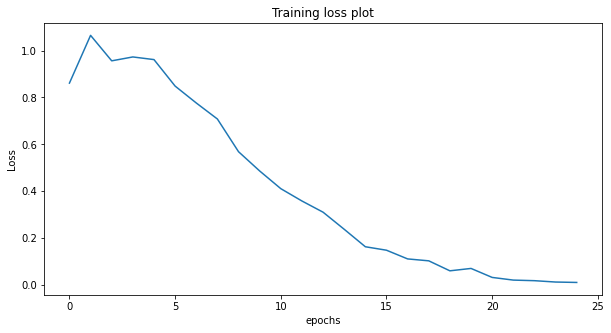

In [52]:
error_plot(loss_all)

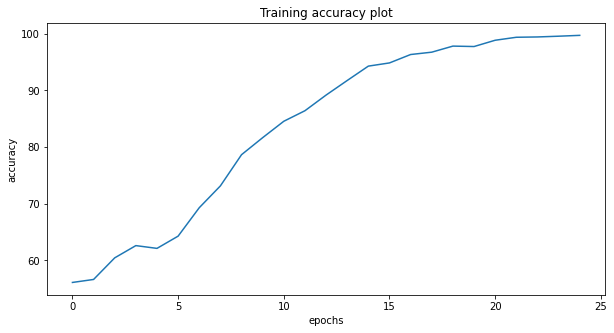

In [53]:
acc_plot(acc_all)

# TESTING

In [ ]:
# DA MODIFICARE: percorso del modello da testare
PATH = '/content/drive/MyDrive/Colab_Notebooks_slowfast/weights_UCF-101/c3d_99.h5'

In [ ]:
from model import resnet50

model = resnet50(class_num=2).to('cuda')
model.load_state_dict(torch.load(PATH))


<All keys matched successfully>

In [ ]:
data_path_train = '/content/UCF-CRIME'
#data_path_test = '/content/drive/MyDrive/Colab_Notebooks_slowfast/UCF-101'
path_train = '/content/UCF-CRIME'
#path_test = '/content/drive/MyDrive/Colab_Notebooks_slowfast/UCF-101'
weights_dir = '/content/drive/MyDrive/Colab_Notebooks_slowfast/weights_UCF-101'

class video_dataset(Dataset):
    def __init__(self,frame_list,sequence_length = 16,transform = None):
        self.frame_list = frame_list
        self.transform = transform
        self.sequence_length = sequence_length
    def __len__(self):
        return len(self.frame_list)
    def __getitem__(self,idx):
        label,path = self.frame_list[idx]
        img = cv2.imread(path)
        seq_img = list()
        for i in range(16):
          img1 = img[:,128*i:128*(i+1),:]
          if(self.transform):
            img1 = self.transform(img1)
          seq_img.append(img1)
        seq_image = torch.stack(seq_img)
        seq_image = seq_image.reshape(3,16,im_size,im_size)
        return seq_image,decoder[label]

id_train = []
for i in os.listdir(path_train):
  p1 = os.path.join(path_train,i)
  for j in os.listdir(p1):
    p2 = os.path.join(p1,j)
    id_train.append((i,p2))
print ("id_train : ", id_train)

train_data = video_dataset(id_train, sequence_length = 16,transform = train_transforms)
train_loader = DataLoader(train_data, batch_size = 8, num_workers = 2 , shuffle = True)

test_data = video_dataset(id_test, sequence_length = 16,transform = train_transforms)
test_loader = DataLoader(test_data, batch_size = 8, num_workers = 2 , shuffle = True)

dataloaders = {'test':test_loader , 'train':train_loader}

id_train :  [('NonViolence', '/content/UCF-CRIME/NonViolence/Normal_Videos565_x264_Trim5.jpg'), ('NonViolence', '/content/UCF-CRIME/NonViolence/Normal_Videos_025_x264_Trim6.jpg'), ('NonViolence', '/content/UCF-CRIME/NonViolence/Normal_Videos058_x264_Trim2.jpg'), ('NonViolence', '/content/UCF-CRIME/NonViolence/Normal_Videos148_x264_Trim0.jpg'), ('NonViolence', '/content/UCF-CRIME/NonViolence/Normal_Videos122_x264_Trim8.jpg'), ('NonViolence', '/content/UCF-CRIME/NonViolence/Normal_Videos032_x264_Trim5.jpg'), ('NonViolence', '/content/UCF-CRIME/NonViolence/Normal_Videos037_x264_Trim4.jpg'), ('NonViolence', '/content/UCF-CRIME/NonViolence/Normal_Videos744_x264_Trim3.jpg'), ('NonViolence', '/content/UCF-CRIME/NonViolence/Normal_Videos158_x264_Trim8.jpg'), ('NonViolence', '/content/UCF-CRIME/NonViolence/Normal_Videos011_x264_Trim9.jpg'), ('NonViolence', '/content/UCF-CRIME/NonViolence/Normal_Videos_025_x264_Trim7.jpg'), ('NonViolence', '/content/UCF-CRIME/NonViolence/Normal_Videos119_x264_Tr

NameError: ignored

In [54]:
# TESTING ZONE #

from sklearn.metrics import confusion_matrix
from torch.autograd import Variable

phase = 'test'
epoch_metrics = {"loss": [], "acc": []}

predlist=torch.zeros(0,dtype=torch.long, device='cuda')
lbllist=torch.zeros(0,dtype=torch.long, device='cuda')

start = time.time()
for batch_i, (X, y) in enumerate(dataloaders[phase]):
    image_sequences = Variable(X.to(device), requires_grad=True)
    labels = Variable(y.to(device), requires_grad=False)
    optimizer.zero_grad()
    predictions = model(image_sequences)

    _, preds = torch.max(predictions, 1)
    predlist=torch.cat([predlist, preds.view(-1).cuda()])
    lbllist=torch.cat([lbllist, labels.view(-1).cuda()])

    loss = cls_criterion(predictions, labels)
    acc = 100 * (predictions.detach().argmax(1) == labels).cpu().numpy().mean()
    # print('acc : ',acc,' -- loss : ',loss.item())
    epoch_metrics["loss"].append(loss.item())
    epoch_metrics["acc"].append(acc)


predlistCPU = predlist.cpu().detach().numpy()
lbllistCPU = lbllist.cpu().detach().numpy()
end = time.time()-start
print("Tempo Impiegato : ", end)
conf_mat = confusion_matrix(lbllistCPU,predlistCPU)
print("Matrice di Confusione : ")
print (conf_mat)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Tempo Impiegato :  57.05752420425415
Matrice di Confusione : 
[[605 905]
 [316 504]]


In [55]:
# CONFUSION MATRIX FUNCTION #
import itertools
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    # print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix


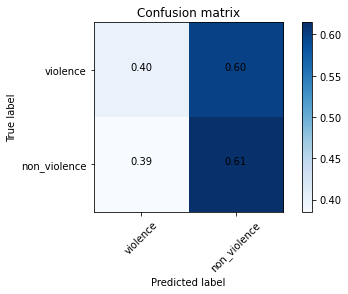

In [56]:
plot_confusion_matrix(conf_mat, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues)

In [57]:
from sklearn.metrics import classification_report
print(classification_report(lbllistCPU, predlistCPU, target_names=classes))

              precision    recall  f1-score   support

    violence       0.66      0.40      0.50      1510
non_violence       0.36      0.61      0.45       820

    accuracy                           0.48      2330
   macro avg       0.51      0.51      0.47      2330
weighted avg       0.55      0.48      0.48      2330



In [58]:
# ACC E LOSS #
print('acc_value : ', np.mean(epoch_metrics["acc"]))
print('loss_value : ', np.mean(epoch_metrics["loss"]))

acc_value :  47.47431506849315
loss_value :  3.7454512285145176
